### Laikrindu apvienošana un analīze

Šajā nodarbībā apvienosim un analizēsim divus datu masīvus, kuri savā starpā atšķiras ar to, kā tajos ir reģistrēti mērījumi.

Izmantosim `pandas` bibliotēku un tās iespējas

In [60]:
import pandas as pd

Ielasīsim datus no nokrišņu faila. Kā redzams, tiek izlaista pirmā rindiņa, jo, aplūkojot failu, tur redzama papildus informācijua par to, kas šie ir par datiem un kā iegūti. Otrajā rindiņā, savukārt, ir kolonnu nosaukumi. Tāpēc `skiprows` norāda, ka jāsāk no otrās rindiņas, kur atrodas nosaukumi.


In [61]:
df1=pd.read_csv("nokrisni_2014.csv", skiprows=1, parse_dates=["Datums \ Laiks"], dayfirst=True, index_col=0)
df1

,05:00,06:00,08:00,09:00,17:00,18:00,20:00,21:00
Datums \ Laiks,,,,,,,,
2014-01-04,NaN,NaN,NaN,NaN,3.1,NaN,0.3,NaN
2014-01-05,NaN,NaN,NaN,NaN,0.1,NaN,0.9,NaN
2014-01-06,0.8,NaN,1.7,NaN,0.6,NaN,NaN,NaN
2014-01-07,NaN,NaN,0.1,NaN,3.5,NaN,NaN,NaN
2014-01-08,NaN,NaN,NaN,NaN,0.0,NaN,0.3,NaN
...,...,...,...,...,...,...,...,...
2014-12-27,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2014-12-28,0.3,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2014-12-29,0.5,NaN,0.3,NaN,0.4,NaN,0.0,NaN


Aplūkojot šos nokrišņu datus var redzēt, ka tie vienas dienas ietvaros ir mērīti noteiktos laika brīžos.

Tā, piemēram, varam aplūkot un atlasīt tikai tos datumus, kad ir bijuši savākti nokrišņi 05:00 un to vērtība ir lielāka par 0.5. Vērts piezīmēt, ka ja nokrišņi nav bijuši, tad parādās vērtība `NaN`. Ļoti labi var redzēt, kā `pandas` veidojas komandu ķēdes. Šo varētu tulkot šādi - "Parādīt Kolonnu ar vērtību "pieci no rīta" atlasot vērtības kur nokrišņi vairāk par 0.5 un atmetot rindas, kur nokrišņu nav. 

In [62]:
df1[["05:00"]].where(df1["05:00"]>0.5).dropna()

,05:00
Datums \ Laiks,
2014-01-06,0.8
2014-01-10,8.5
2014-01-12,2.3
2014-02-01,3.1
2014-02-08,3.0
2014-02-12,0.6
2014-02-16,1.7
2014-02-19,1.9
2014-02-20,0.7


Tā kā šie ir nokrišņi starp termiņiem, tad no šiem datiem var atrast dienas summāros nokrišņus izmantojot `pandas` funkciju summēt. Parametrs `axis` norāda veidu, kā to darīt. Kad `axis=1`, summēšana notiek "pa rindām" jeb horizontāli, divu dimensiju datu gadījumā.
Svarīgi ir sākumā norādīt šīs jaunizveidotās kolonnas `sum` vērtību vienādu ar nulli, citādi katru nākošo reizi atkārtojot šo koda daļu, tiks pieskaitīta šajā kolonnā esošā vērtība.

In [63]:
df1["sum"]=0
df1["sum"]=df1.sum(axis=1)
df1

,05:00,06:00,08:00,09:00,17:00,18:00,20:00,21:00,sum
Datums \ Laiks,,,,,,,,,
2014-01-04,NaN,NaN,NaN,NaN,3.1,NaN,0.3,NaN,3.4
2014-01-05,NaN,NaN,NaN,NaN,0.1,NaN,0.9,NaN,1.0
2014-01-06,0.8,NaN,1.7,NaN,0.6,NaN,NaN,NaN,3.1
2014-01-07,NaN,NaN,0.1,NaN,3.5,NaN,NaN,NaN,3.6
2014-01-08,NaN,NaN,NaN,NaN,0.0,NaN,0.3,NaN,0.3
...,...,...,...,...,...,...,...,...,...
2014-12-27,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0
2014-12-28,0.3,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.3
2014-12-29,0.5,NaN,0.3,NaN,0.4,NaN,0.0,NaN,1.2


Varam atmest visas pārējās kolonnas. Mainīgo `df1` varam aizstāt tikai ar nokrišņu summas datiem.

In [64]:
df1=df1[["sum"]]
df1

,sum
Datums \ Laiks,
2014-01-04,3.4
2014-01-05,1.0
2014-01-06,3.1
2014-01-07,3.6
2014-01-08,0.3
...,...
2014-12-27,0.0
2014-12-28,0.3
2014-12-29,1.2


#### Otrā datu masīva ielasīšana.

In [73]:
df2=pd.read_csv("station_data.csv", parse_dates=["Date"], index_col=0)
df2

,1_param,2_param,3_param,4_param,5_param,6_param,7_param,1_param_b,2_param_b,3_param_b,4_param_b,5_param_b,6_param_b,7_param_b
Date,,,,,,,,,,,,,,
2014-08-18,0.51,0.033,0.84,0.0000,0.0320,5.6000,27.948,8.51,4.257,12.87,1.5480,1.2420,59.1600,14.780
2014-09-15,0.27,0.160,0.30,62.8940,52.5000,580.8000,21.014,0.14,0.170,10.64,2.2500,6.1600,111.9800,7.590
2014-09-27,1.54,3.492,20.48,0.8820,0.8500,44.5400,10.444,0.40,0.580,24.49,0.2880,0.8820,91.9440,29.146
2014-10-13,0.00,7.688,41.60,3.7800,2.9280,163.0080,27.846,0.14,4.251,25.74,1.0070,2.5200,161.8750,16.317
2014-10-26,0.13,5.670,13.72,2.1700,2.7200,29.2060,24.585,0.34,4.375,27.06,0.3190,1.9000,334.8100,18.564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-10,0.25,7.140,21.84,8.5652,3.3693,NaN,24.570,10.20,11.072,22.77,1.9149,1.2857,1.7542,26.936
2020-07-12,0.66,25.560,48.00,28.2317,26.6526,NaN,15.708,1.68,2.088,4.32,0.1368,0.1302,33.8504,8.855
2020-08-03,0.46,47.500,72.60,9.3366,11.9301,94.3353,24.732,2.25,0.752,3.64,0.1470,0.2204,24.2848,7.190


Savukārt šajā failā var redzēt, ka mērījumi nav veikti secīgi un eksistē dažādi laika periodi starp veiktajiem novērojumiem.

Ja tas ir nepieciešams, šādu nekonsekventu laikrindu var aizpildīt ar `NaN` vērtībām, bet padarītu laikā konsekventu, pievienojot rindiņas ik pa dienai izmantojot komandu `asfreq`. Pie tam biežumu `freq` var mainīt gan pēc skaita, gan veida. Šajā gadījumā `1D` nozīmē ik pa vienai dienai. Bet var arī norādīt šo datu tabulu veidot `2D` vai `1M`, attiecīgi tā tiks pārveidota, atstājot laikrindas vērtības ik pa divām dienām vai vienam mēnesim. Jāsaka, ka šajos pēdējos piemēros tiks pazaudēti dati.

In [74]:
df2=df2.asfreq(freq="1D")

Attēlosim datu masīva pēdējās 30 vērtības

In [75]:
df2.tail(30)

,1_param,2_param,3_param,4_param,5_param,6_param,7_param,1_param_b,2_param_b,3_param_b,4_param_b,5_param_b,6_param_b,7_param_b
Date,,,,,,,,,,,,,,
2020-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-09,0.11,18.15,16.72,10.2528,11.2561,NaN,20.007,5.10,2.03,4.76,0.9856,0.5208,2.3742,32.480
2020-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Bet varbūt ir nepieciešams aizpildīt `NaN` vērtības ar mērītajām vērtībām? Ir dažādas `method` kā to izdarīt. Tā, piemēram `bfill` ņem un aizpilda ar konkrēto vērtību norādītu skaitu `limit` iepriekšējo laikrindas rindu vērtības.

In [76]:
df2b=df2.fillna(method="bfill", limit=4)

Aplūkojot pirmās 30 masīva vērtības var redzēt, ka pēc pirmās vērtības 18.augustā nākošajās dienās mērījumi veikti nav - vienādi ar `NaN`, bet 15.septembra veiktais mērījums ir "pārkopēts" arī četras dienas pirms 15.septembra.

In [77]:
df2b.head(30)

,1_param,2_param,3_param,4_param,5_param,6_param,7_param,1_param_b,2_param_b,3_param_b,4_param_b,5_param_b,6_param_b,7_param_b
Date,,,,,,,,,,,,,,
2014-08-18,0.51,0.033,0.84,0.000,0.032,5.6,27.948,8.51,4.257,12.87,1.548,1.242,59.16,14.78
2014-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Varam arī attēlot kāda konkrēta parametra vērtību kādā konkrētā laika periodā. Veidojot stabiņu diagramu svarīgi ir atmest `NaN` vērtības, jo citādāk X ass būs nesalasāma.

<AxesSubplot: xlabel='Date'>

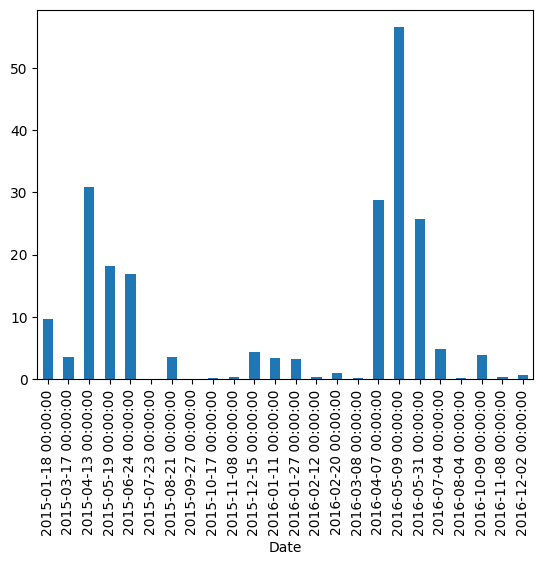

In [81]:
df2["1_param"]["2015":"2016"].dropna().plot.bar()

Taču otrādāk ir ar līnijas grafiku. Ja būs izņemti `NaN`, tad punktus savienos ar vērtību. 
Var x ass datumus sagriezt leņķī, lai vieglāk izlasīt. Tam paredzēta komanda `rot`. Varbūt arī attēlot punktus un savietot ar raustītu līniju.

<AxesSubplot: xlabel='Date'>

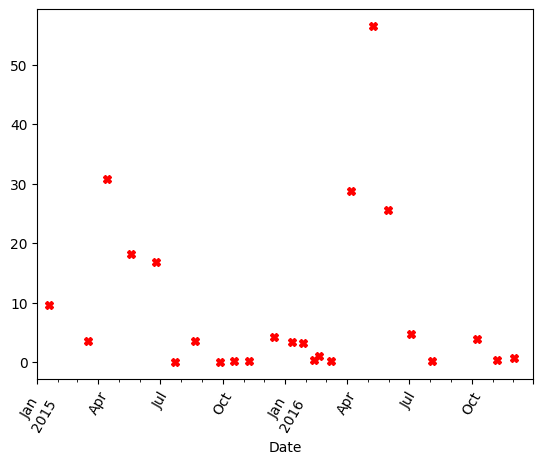

In [105]:
df2["1_param"]["2015":"2016"].plot(rot=60, linestyle='-', marker='X', color="Red")

<AxesSubplot: xlabel='Date'>

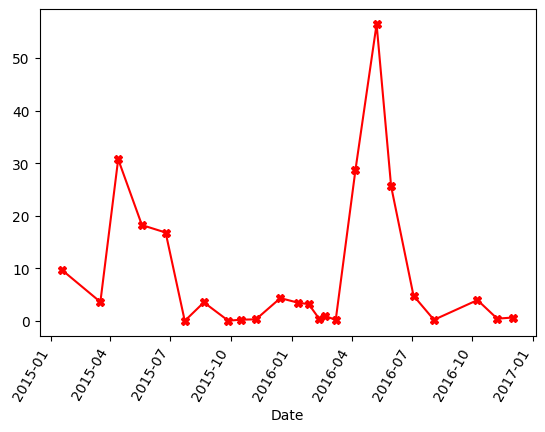

In [107]:
df2["1_param"]["2015":"2016"].dropna().plot(rot=60, linestyle='-', marker='X', color="Red")

Salīdzinot abus iepriekšējos grafikus, var redzēt, ka atmetot `NaN` vērtības, punkti tiek savienoti ar līnijām, jo datu masīvā "nav `NaN` radītu pārtraukumu". 

Savukārt vērts pievērst uzmanību, ka abas laikrindas X asi veido vienādi laikā.

### Divu datu masīvu apvienošana

Mums ir divi masīvi - nokrišņi katru dienu masīvā `df1` un dažādu parametru vērtības masīvā `df2`.

Uzdevums - apvienot šos masīvus vienā tā, lai tiktu saglabāti gan nokrišņu, gan citu parametru vērtības, savukārt rindas, kurās nekādas vērtības nav, tiktu izdzēstas.

Lai apvienotu pilnībā abus masīvus, ieskaitot arī vērtības, kuras vienādas ar `NaN`, izmanto `join` veidu - `how="outer"`. Savukārt lai atmestu rindas, kurās nav neviena mērījuma, 

In [112]:
df1.join(df2, how="outer").dropna(how="all")

,sum,1_param,2_param,3_param,4_param,5_param,6_param,7_param,1_param_b,2_param_b,3_param_b,4_param_b,5_param_b,6_param_b,7_param_b
2014-01-04,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-05,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,3.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-10,NaN,0.25,7.14,21.84,8.5652,3.3693,NaN,24.570,10.20,11.072,22.77,1.9149,1.2857,1.7542,26.936
2020-07-12,NaN,0.66,25.56,48.00,28.2317,26.6526,NaN,15.708,1.68,2.088,4.32,0.1368,0.1302,33.8504,8.855
2020-08-03,NaN,0.46,47.50,72.60,9.3366,11.9301,94.3353,24.732,2.25,0.752,3.64,0.1470,0.2204,24.2848,7.190
2020-09-09,NaN,0.11,18.15,16.72,10.2528,11.2561,NaN,20.007,5.10,2.030,4.76,0.9856,0.5208,2.3742,32.480
